<a href="https://colab.research.google.com/github/nevilshah444/Dimensionality_reduction_Assignment/blob/main/Dimensionality_reduction_image_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Dimensionality** **Reduction**

# Importing the libraries and the dataset.
Dataset :-fetch_lfw_pairs
 
 https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_lfw_pairs.html#sklearn.datasets.fetch_lfw_pairs 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_lfw_pairs
import plotly.express as px

a= fetch_lfw_pairs()
data = a.data
data.shape

(2200, 5828)

In [ ]:
a.target

array([1, 1, 1, ..., 0, 0, 0])

Target :- The two label values being different persons or the same person.

This image dataset has 2200 rows and 5828 dimensions.

#Method 1:- Principal Component Analysis 


a)With 2 components

In [ ]:
from sklearn.decomposition import PCA
 
b = PCA(2) # we need 2 principal components.
converted_data = b.fit_transform(a.data)
 
converted_data.shape

(2200, 2)

Here, the original 5828 dimensions in the dataset are reduced to 2 components using PCA.

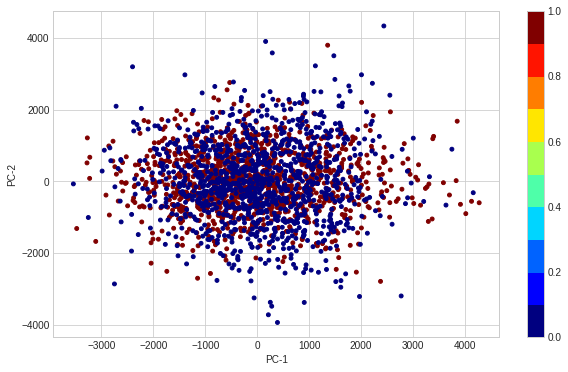

In [ ]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize = (10, 6))
c_map = plt.cm.get_cmap('jet', 10)
plt.scatter(converted_data[:, 0], converted_data[:, 1], s = 15,
            cmap = c_map , c = a.target)
plt.colorbar()
plt.xlabel('PC-1') , plt.ylabel('PC-2')
plt.show()

In [ ]:
print('Variance explained by the First 2 PCs = ', np.cumsum(b.explained_variance_ratio_ * 100)[1])

Variance explained by the First 2 PCs =  24.120518


b) with 3 components

In [ ]:
c = PCA(3) # we need 2 principal components.
Data = c.fit_transform(a.data)
 
Data.shape

(2200, 3)

In [ ]:
print('Variance explained by the 3 components = ', np.cumsum(c.explained_variance_ratio_ * 100)[2])

Variance explained by the 3 components =  29.726528


In [ ]:
x = px.scatter_3d(
    Data, x=0, y=1, z=2,
    color=a.target
)
x.update_traces(marker_size=4)

#Method 2:- Singular Value Decomposition.

a) with 2 components

In [ ]:
from sklearn.decomposition import TruncatedSVD

svd =  TruncatedSVD(n_components = 2)
A= svd.fit_transform(data)

In [ ]:
 #Printing first 5 elements of the transformed matrix
print("Transformed Matrix:")
print(A[:5])

Transformed Matrix:
[[ 9815.92      -108.4109  ]
 [10448.876    -1395.8992  ]
 [ 8847.626      997.09265 ]
 [ 7410.615      -60.685314]
 [ 8545.195     -327.52612 ]]


In [ ]:
print('Variance explained by the First 2 PCs = ', np.cumsum(svd.explained_variance_ratio_ * 100)[1])

Variance explained by the First 2 PCs =  23.68438


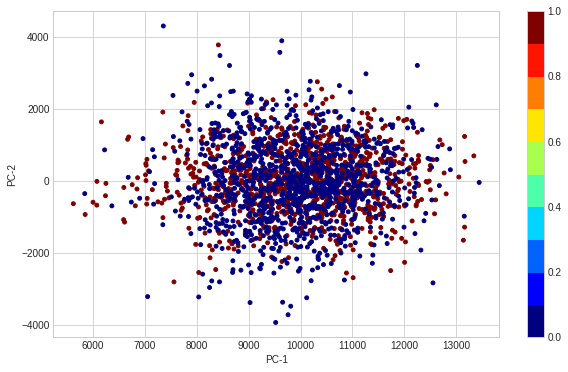

In [ ]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize = (10, 6))
c_map = plt.cm.get_cmap('jet', 10)
plt.scatter(A[:, 0], A[:, 1], s = 15,
            cmap = c_map , c = a.target)
plt.colorbar()
plt.xlabel('PC-1') , plt.ylabel('PC-2')
plt.show()

b) with 3 components

In [ ]:
svd1 =  TruncatedSVD(n_components = 3)
B= svd1.fit_transform(data)

In [ ]:
print('Variance explained by the 3 Components = ', np.cumsum(svd1.explained_variance_ratio_ * 100)[2])

Variance explained by the 3 Components =  29.30211


In [ ]:
# visualization in 3d
y = px.scatter_3d(
     B, x=0, y=1, z=2,
    color=a.target,
)
y.update_traces(marker_size=4)

Method 3:- Locally Linear Embedding (LLE)

a) with 2 components

In [ ]:
from sklearn.manifold import LocallyLinearEmbedding

e= LocallyLinearEmbedding(n_components = 2)
X1 = e.fit_transform(data)


In [ ]:
X1.shape

(2200, 2)

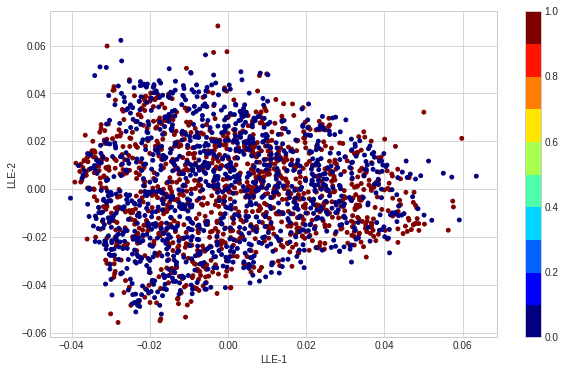

In [ ]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize = (10, 6))
c_map = plt.cm.get_cmap('jet', 10)
plt.scatter(X1[:, 0], X1[:, 1], s = 15,
            cmap = c_map , c = a.target)
plt.colorbar()
plt.xlabel('LLE-1') , plt.ylabel('LLE-2')
plt.show()

b) with 3 components

In [ ]:
D = LocallyLinearEmbedding(n_components = 3)
C = D.fit_transform(data)

In [ ]:
C.shape

(2200, 3)

In [ ]:
# visualization in 3d
z = px.scatter_3d(
     C, x=0, y=1, z=2,
    color=a.target,
)
z.update_traces(marker_size=4)

#Method 4:-t-distributed stochastic neighbor embedding (t-SNE)

a) with 2 components

In [ ]:
from sklearn.manifold import TSNE

X2= TSNE(n_components = 2).fit_transform(data)

In [ ]:
X2.shape

(2200, 2)

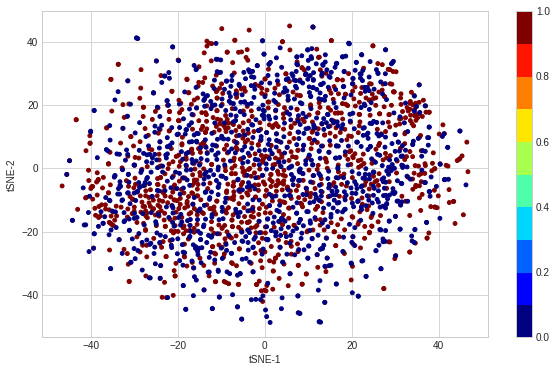

In [ ]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize = (10, 6))
c_map = plt.cm.get_cmap('jet', 10)
plt.scatter(X2[:, 0], X2[:, 1], s = 15,
            cmap = c_map , c = a.target)
plt.colorbar()
plt.xlabel('tSNE-1') , plt.ylabel('tSNE-2')
plt.show()

b) with 3 components 

In [ ]:
X8= TSNE(n_components = 3).fit_transform(data)

In [ ]:
X8.shape

(2200, 3)

In [ ]:
# visualization in 3d
z = px.scatter_3d(
     X8, x=0, y=1, z=2,
    color=a.target,
)
z.update_traces(marker_size=4)

#Method 5:-Isometric Mapping(ISOMAP)

a) with 2 components

In [ ]:
from sklearn.manifold import Isomap

f = Isomap(n_components = 2)
X3 = f.fit_transform(data)


In [ ]:
X3.shape

(2200, 2)

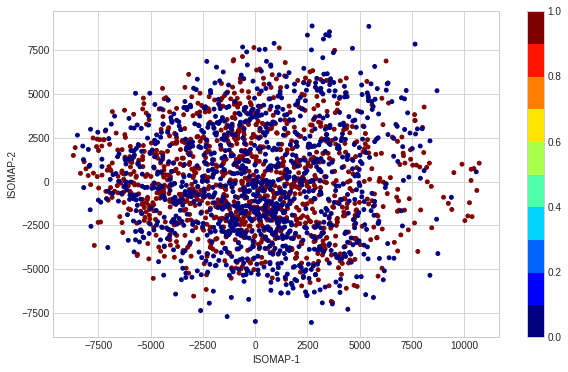

In [ ]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize = (10, 6))
c_map = plt.cm.get_cmap('jet', 10)
plt.scatter(X3[:, 0], X3[:, 1], s = 15,
            cmap = c_map , c = a.target)
plt.colorbar()
plt.xlabel('ISOMAP-1') , plt.ylabel('ISOMAP-2')
plt.show()

b) with 3 components

In [ ]:
g = Isomap(n_components = 3)
X4 = g.fit_transform(data)

In [ ]:
X4.shape

(2200, 3)

In [ ]:
# visualization in 3d
z = px.scatter_3d(
     X4, x=0, y=1, z=2,
    color=a.target,
)
z.update_traces(marker_size=4)

#Method 6:- Uniform Manifold Approximation and Projection(UMAP)

In [ ]:
!pip install umap-learn

     |████████████████████████████████| 86 kB 1.6 MB/s 
     |████████████████████████████████| 1.1 MB 4.7 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.2-py3-none-any.whl size=82709 sha256=e51d606ba966c101ee9bd6faf4a98037c7233199a7d51e6b602981874e363a7c
  Stored in directory: /root/.cache/pip/wheels/84/1b/c6/aaf68a748122632967cef4dffef68224eb16798b6793257d82
  Created wheel for pynndescent: filename=pynndescent-0.5.5-py3-none-any.whl size=52603 sha256=cafd7ef74fdd4786a8bcb76b5d38d711fcd0f634a1f8336272c8550259dcdbb0
  Stored in directory: /root/.cache/pip/wheels/af/e9/33/04db1436df0757c42fda8ea6796d7a8586e23c85fac355f476
Successfully built umap-learn pynndescent


In [ ]:
import umap.umap_ as umap
trans = umap.UMAP(n_neighbors=5, random_state=42, n_components = 2).fit(data)

/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning:

The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.



Text(0.5, 1.0, 'Embedding by UMAP')

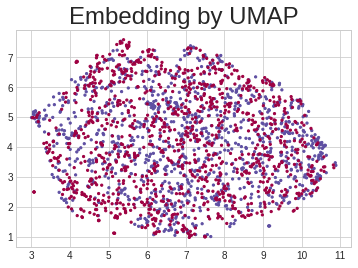

In [ ]:
plt.scatter(trans.embedding_[:, 0], trans.embedding_[:, 1], s = 5, c = a.target, cmap = 'Spectral')
plt.title('Embedding by UMAP', fontsize=24)

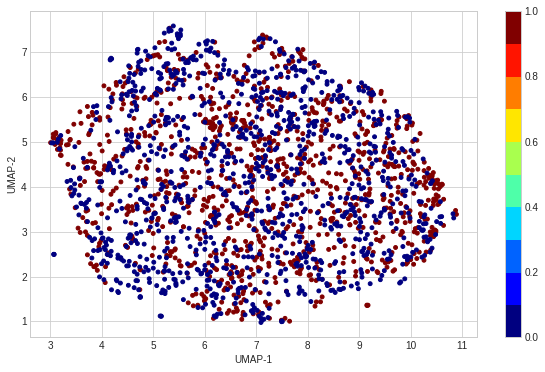

In [ ]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize = (10, 6))
c_map = plt.cm.get_cmap('jet', 10)
plt.scatter(trans.embedding_[:, 0], trans.embedding_[:, 1], s = 15,
            cmap = c_map , c = a.target)
plt.colorbar()
plt.xlabel('UMAP-1') , plt.ylabel('UMAP-2')
plt.show()

In [ ]:
umap_3d = umap.UMAP(n_components=3, init='random', random_state=0)

In [ ]:
proj_3d = umap_3d.fit_transform(data)

In [ ]:
fig_3d = px.scatter_3d(
    proj_3d, x=0, y=1, z=2,
    color=a.target, labels={'color': 'species'}
)
fig_3d.update_traces(marker_size=5)

#Comparing the results of all the 6 dimensionality methods in 2D Scatter Plots

In [ ]:
#Importing the required libraries
from collections import OrderedDict
from functools import partial
from time import time
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter
from sklearn import manifold, datasets
from sklearn.decomposition import PCA



LLE: 72 sec
t-SNE: 87 sec
UMAP: 16 sec
ISOMAP: 71 sec
SVD: 0.62 sec
PCA: 0.84 sec


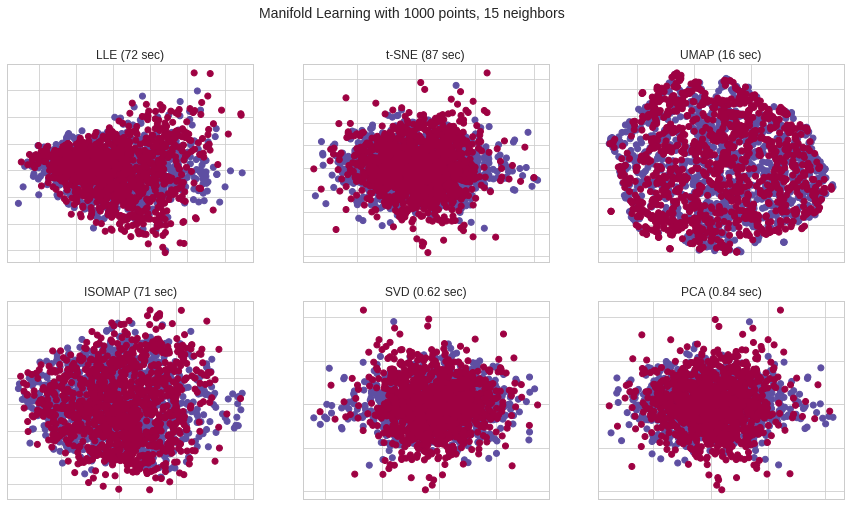

In [ ]:
n_neighbors = 15
n_components = 2
# Creating the plot
fig = plt.figure(figsize=(15, 8))
fig.suptitle("Manifold Learning with %i points, %i neighbors"
             % (1000, n_neighbors), fontsize=14)

# Making a dictionary 'methods' containing LLE, t-SNE and PCA
LLE = partial(manifold.LocallyLinearEmbedding,
              n_neighbors, n_components, eigen_solver='auto')
methods = OrderedDict()
methods['LLE'] = LLE()
methods['t-SNE'] = manifold.TSNE(n_components=n_components, init='pca')
methods['UMAP'] = umap.UMAP(n_neighbors=5, random_state=42, n_components = 2)
methods['ISOMAP'] = Isomap(n_components = 2)
methods['SVD'] = TruncatedSVD(n_components = 2)
methods['PCA']=PCA(n_components=2)
# Plotting the results
for i, (label, method) in enumerate(methods.items()):
    t0 = time()
    Y = method.fit_transform(data)
    t1 = time()
    print("%s: %.2g sec" % (label, t1 - t0))
    ax = fig.add_subplot(2, 3, i + 1)
    ax.scatter(Y[:, 0], Y[:, 1], c=a.target, cmap=plt.cm.Spectral)
    ax.set_title("%s (%.2g sec)" % (label, t1 - t0))
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.axis('tight')
   
plt.show()

#**Conclusion**

Dimensionality Reduction refers to the reduction in the number of features or variables in  context of representing an entity.Among all the methods, the best method for dimensionality reduction in this case is UMAP as the data points in the above 2D graph for  UMAP method are the most scattered. Hence, according to me, UMAP is the best method for dimensionality reductionas they are the least densely populated.

References :- 

1)https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_lfw_pairs.html#sklearn.datasets.fetch_lfw_pairs